#### 1. Importing the necessary libraries

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

#### 2. Reading the data as a dataframe

In [60]:
bank_df = pd.read_csv('bank-full.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### Printing the shape of the data

In [61]:
bank_df.shape

(45211, 17)

#### Printing the datatypes of the columns

In [62]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

#### Checking the presence of null values

In [63]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [64]:
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [65]:
bank_df.isnull().values.any()

False

#### Conclusion: There is no null values in any colums, hence we are good to go

#### Description of the numerical columns

In [66]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


#### Checking the presence of any outliers in any columns

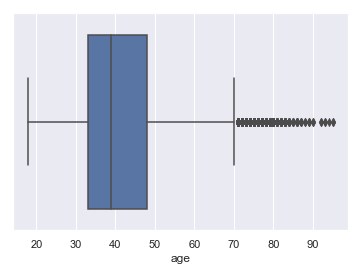

In [16]:
sns.boxplot(bank_df['age'])

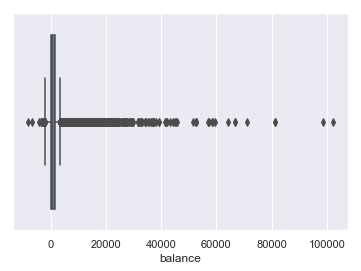

In [17]:
sns.boxplot(bank_df['balance'])

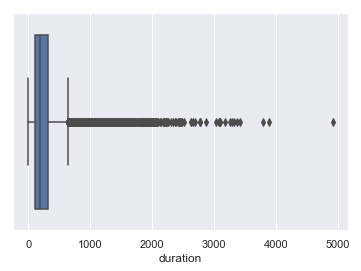

In [19]:
sns.boxplot(bank_df['duration'])

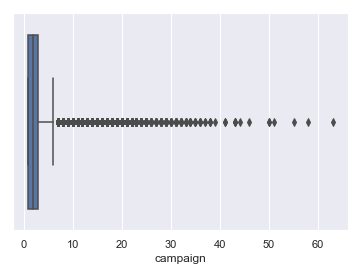

In [20]:
sns.boxplot(bank_df['campaign'])

#### There are significant outliers in many columsn which might affect the model performance

#### Distribution of categorical columns

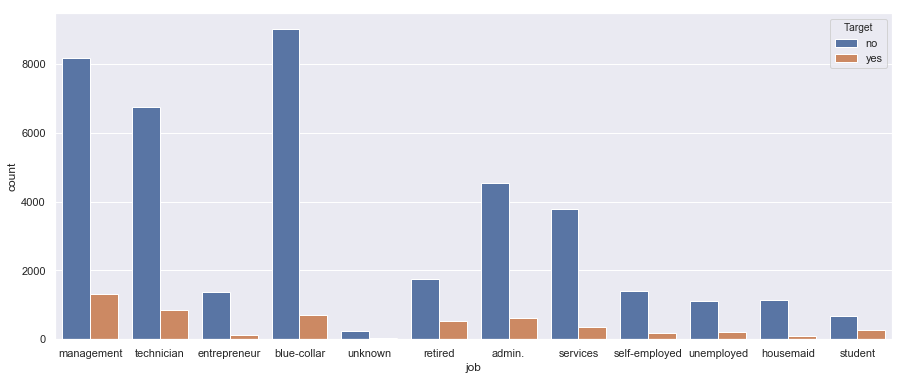

In [30]:
plt.figure(figsize=(15,6))
sns.countplot(bank_df['job'], hue = bank_df['Target'])

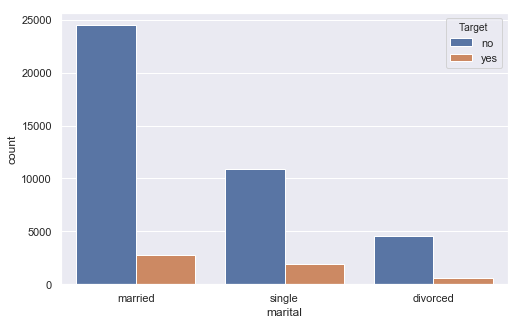

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(bank_df['marital'], hue = bank_df['Target'])

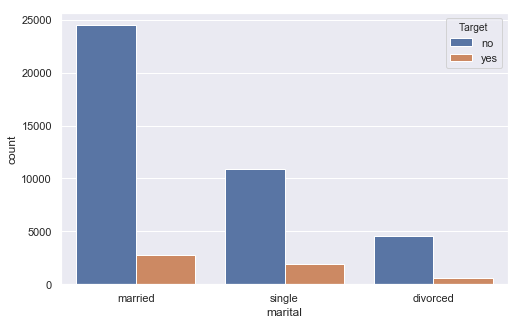

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(bank_df['marital'], hue = bank_df['Target'])

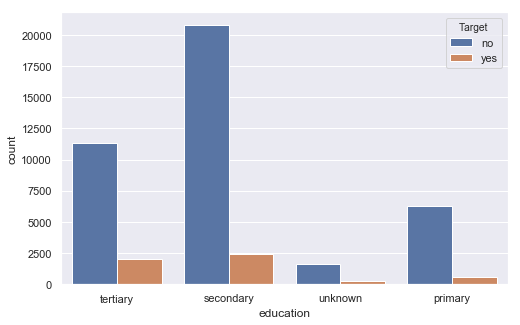

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(bank_df['education'], hue = bank_df['Target'])

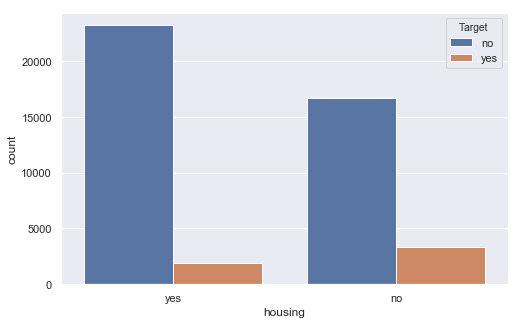

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(bank_df['housing'], hue = bank_df['Target'])

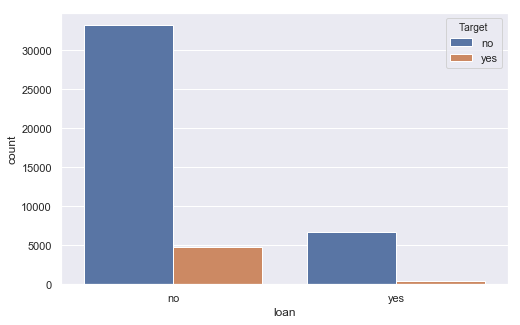

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(bank_df['loan'], hue = bank_df['Target'])

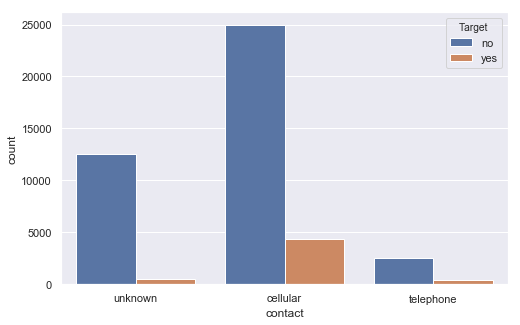

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(bank_df['contact'], hue = bank_df['Target'])

#### Let's run a pairplot to check the relationamong different features

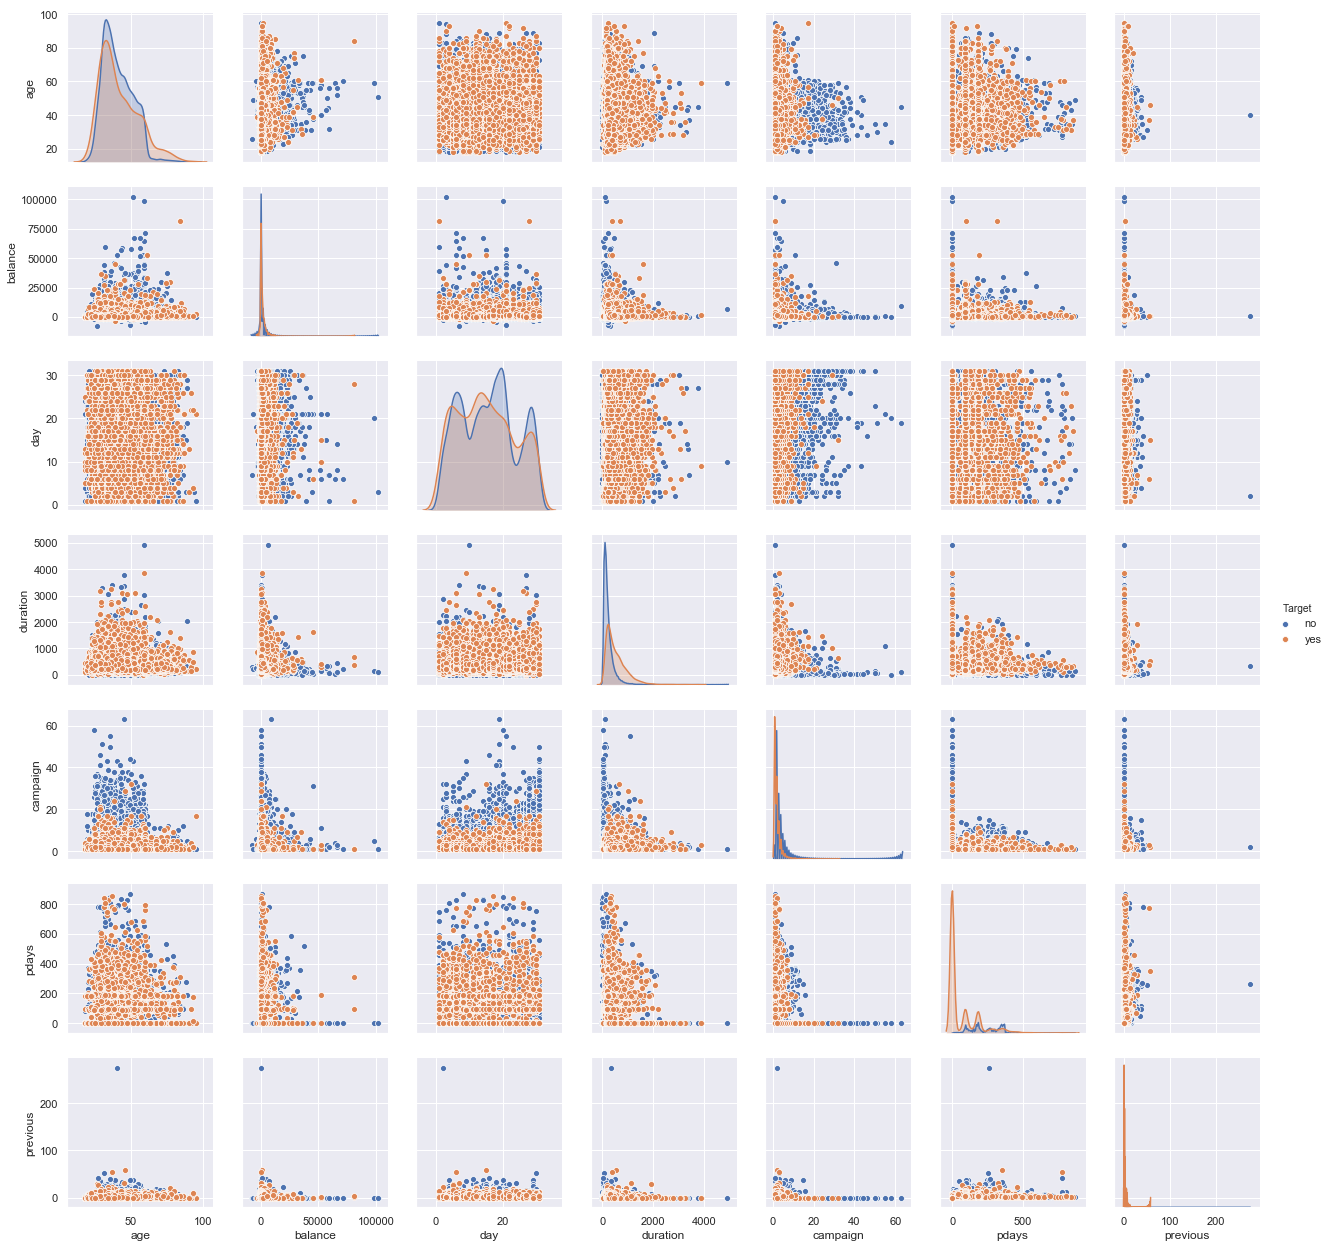

In [49]:
sns.pairplot(bank_df, diag_kind ='kde', hue='Target')

#### Plotting a heatmap to check the Pearson correlation co-efficient which might help us in feature selections

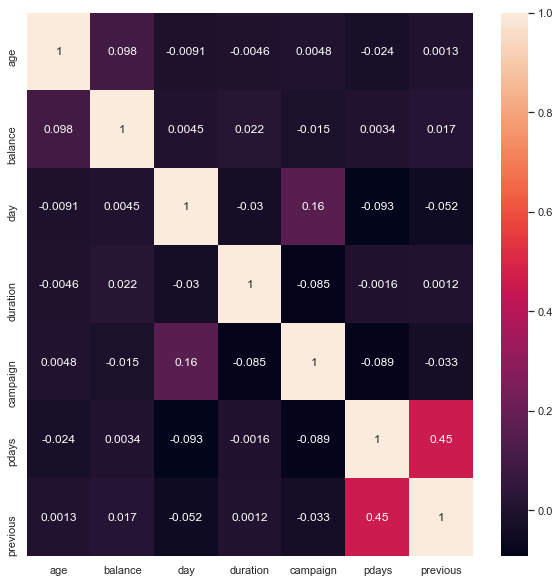

In [47]:
plt.figure(figsize = (10,10))
sns.heatmap(bank_df.corr(method = 'pearson'), annot = True)

#### Instantiating Label Encoder to convert categorical columns into categorical codes

In [67]:
le = LabelEncoder()

#### Checking the distribution of our target column

In [68]:
bank_df.Target.value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

#### Conclusion: There is a lot of difference in the distribution of the target columns, No will be predicted better than Yes.

In [75]:
for feature in bank_df.columns:
    if bank_df[feature].dtype == 'object':
        bank_df[feature]=le.fit_transform(bank_df[feature])

In [76]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
age          45211 non-null int64
job          45211 non-null int32
marital      45211 non-null int32
education    45211 non-null int32
default      45211 non-null int32
balance      45211 non-null int64
housing      45211 non-null int32
loan         45211 non-null int32
contact      45211 non-null int32
day          45211 non-null int64
month        45211 non-null int32
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int32
dtypes: int32(9), int64(7)
memory usage: 4.0 MB


In [72]:
bank_df.Target.value_counts()

0    39922
1     5289
Name: Target, dtype: int64

#### Selecting Inputs and Target

In [73]:
X = bank_df.drop('Target', axis = 1)
y= bank_df.pop('Target')

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 9)

#### Logistic Regression Model

In [23]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_predict = logreg.predict(X_test)

C:\Users\Souvik Saha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
logreg.score(X_train, y_train)

0.8906373431920878

In [22]:
logreg.score(X_test, y_test)

0.8886759068121498

In [31]:
print(metrics.confusion_matrix(y_test, y_predict))

[[11713   251]
 [ 1259   341]]


In [30]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11964
           1       0.58      0.21      0.31      1600

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.74      0.60      0.63     13564
weighted avg       0.86      0.89      0.87     13564



In [32]:
metrics.accuracy_score(y_test, y_predict)

0.8886759068121498

#### Creating a dataframe to store accuracy scores for all models to help in model comparison

In [45]:
col_names =  ['Model Name', 'Accuracy']
model_comparison  = pd.DataFrame(columns = col_names)
model_comparison

,Model Name,Accuracy


In [46]:
model_comparison.loc[len(model_comparison)] = 'Logistic Regression', '88.87'

#### Gaussian Naive Bayes Classifier

In [37]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_predict = nb.predict(X_test)

In [38]:
nb.score(X_train, y_train)

0.8417859512750023

In [39]:
nb.score(X_test, y_test)

0.8367000884694781

In [41]:
print(metrics.confusion_matrix(y_test, y_predict))

[[10636  1328]
 [  887   713]]


In [42]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91     11964
           1       0.35      0.45      0.39      1600

   micro avg       0.84      0.84      0.84     13564
   macro avg       0.64      0.67      0.65     13564
weighted avg       0.86      0.84      0.85     13564



In [43]:
print(metrics.accuracy_score(y_test, y_predict))

0.8367000884694781


In [47]:
model_comparison.loc[len(model_comparison)] = 'Gaussian Naive Bayes Classifier', '83.67'

#### KNN Classifier

In [21]:
mylist = list(range(1,32))
neighbours = (list(filter(lambda x: x%2 != 0, mylist)))
print(neighbours)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]


#### Finding the optimal value of K

In [54]:
ac_scores = []

for k in neighbours:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    scores = metrics.accuracy_score(y_test, y_predict)
    ac_scores.append(scores)

MSE = [1 - x for x in ac_scores]

optimal_k = neighbours[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 29


In [56]:
knn = KNeighborsClassifier(n_neighbors = 29)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=29, p=2,
           weights='uniform')

In [58]:
knn.score(X_train, y_train)

0.8923120674945493

In [59]:
knn.score(X_test, y_test)

0.8858743733411973

In [60]:
y_predict = knn.predict(X_test)

In [62]:
print(metrics.confusion_matrix(y_test, y_predict))

[[11704   260]
 [ 1288   312]]


In [63]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11964
           1       0.55      0.20      0.29      1600

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.72      0.59      0.61     13564
weighted avg       0.86      0.89      0.86     13564



In [64]:
print(metrics.accuracy_score(y_test, y_predict))

0.8858743733411973


In [48]:
model_comparison.loc[len(model_comparison)] = 'KNN Classifier', '88.59'

#### SVM Algorithm

In [17]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_predict = svm_model.predict(X_test)

C:\Users\Souvik Saha\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [18]:
svm_model.score(X_train, y_train)

0.9998420071412772

In [19]:
svm_model.score(X_test, y_test)

0.8820406959598939

In [20]:
print(metrics.confusion_matrix(y_test, y_predict))

[[11964     0]
 [ 1600     0]]


In [21]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11964
           1       0.00      0.00      0.00      1600

   micro avg       0.88      0.88      0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564



C:\Users\Souvik Saha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Souvik Saha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Souvik Saha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
print(metrics.accuracy_score(y_test, y_predict))

0.8820406959598939


In [49]:
model_comparison.loc[len(model_comparison)] = 'SVM', '88.20'

#### Decision Tree Classifier

In [33]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 14)

In [42]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=14,
            splitter='best')

In [43]:
dt_model.score(X_train, y_train)

1.0

In [44]:
dt_model.score(X_test, y_test)

0.8773223237982896

In [45]:
y_predict = dt_model.predict(X_test)

In [46]:
print(metrics.confusion_matrix(y_test, y_predict))

[[11116   848]
 [  816   784]]


In [47]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11964
           1       0.48      0.49      0.49      1600

   micro avg       0.88      0.88      0.88     13564
   macro avg       0.71      0.71      0.71     13564
weighted avg       0.88      0.88      0.88     13564



In [48]:
print(metrics.accuracy_score(y_test, y_predict))

0.8773223237982896


In [50]:
model_comparison.loc[len(model_comparison)] = 'Decision Tree Classifier', '87.73'

#### Creating a GridSearch to find the best possible combination to give a better score

In [51]:
parameters = {'min_samples_split' : range(2,50), 'max_depth': range(1,10)}

In [52]:
dt_model_gridsearch = GridSearchCV(dt_model, param_grid=parameters, scoring = 'accuracy', cv=10)

In [56]:
print(dt_model_gridsearch.best_estimator_)
print(dt_model_gridsearch.best_score_)
print(dt_model_gridsearch.best_params_)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=39,
            min_weight_fraction_leaf=0.0, presort=False, random_state=14,
            splitter='best')
0.9016968433026827
{'max_depth': 8, 'min_samples_split': 39}


In [53]:
dt_model_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=14,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(2, 50), 'max_depth': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [57]:
dt_model_gridsearch.score(X_train, y_train)

0.9133251177046797

In [58]:
dt_model_gridsearch.score(X_test, y_test)

0.9004718372161604

In [60]:
y_predict = dt_model_gridsearch.predict(X_test)

In [61]:
print(metrics.confusion_matrix(y_test, y_predict))

[[11533   431]
 [  919   681]]


In [62]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     11964
           1       0.61      0.43      0.50      1600

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.77      0.69      0.72     13564
weighted avg       0.89      0.90      0.89     13564



In [63]:
print(metrics.accuracy_score(y_test, y_predict))

0.9004718372161604


In [51]:
model_comparison.loc[len(model_comparison)] = 'Decision Tree Classifier-Grid Search', '90.04'

#### Conclusion: GridSearch CV increased the score

#### Bagging Classifier (Ensemble)

In [131]:
bc_model = BaggingClassifier( n_estimators = 50, max_samples = 0.8, bootstrap = True, oob_score = True, random_state =22)

In [132]:
bc_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=0.8,
         n_estimators=50, n_jobs=None, oob_score=True, random_state=22,
         verbose=0, warm_start=False)

In [133]:
bc_model.score(X_train, y_train)

0.996934938540778

In [134]:
bc_model.score(X_test, y_test)

0.9023886759068122

In [135]:
y_predict = bc_model.predict(X_test)

In [136]:
print(metrics.confusion_matrix(y_test, y_predict))

[[11477   487]
 [  837   763]]


In [137]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11964
           1       0.61      0.48      0.54      1600

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.77      0.72      0.74     13564
weighted avg       0.89      0.90      0.90     13564



In [138]:
print(metrics.accuracy_score(y_test, y_predict))

0.9023886759068122


In [52]:
model_comparison.loc[len(model_comparison)] = 'Bagging Classifier', '90.23'

#### Random Forest Classifier

In [144]:
rf_model = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 21)

In [145]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=21, verbose=0, warm_start=False)

In [146]:
rf_model.score(X_train, y_train)

0.9996524157108099

In [147]:
rf_model.score(X_test, y_test)

0.9029047478619876

In [148]:
y_predict = rf_model.predict(X_test)

In [149]:
print(metrics.confusion_matrix(y_test, y_predict))

[[11592   372]
 [  945   655]]


In [150]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11964
           1       0.64      0.41      0.50      1600

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.78      0.69      0.72     13564
weighted avg       0.89      0.90      0.89     13564



In [151]:
print(metrics.accuracy_score(y_test, y_predict))

0.9029047478619876


In [53]:
model_comparison.loc[len(model_comparison)] = 'Random Forest Classifier', '90.29'

#### Ada Boosing Classifier

In [265]:
adboost_model = AdaBoostClassifier(n_estimators = 120, random_state = 44)

In [266]:
adboost_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=120, random_state=44)

In [267]:
adboost_model.score(X_train, y_train)

0.9014756533004709

In [268]:
adboost_model.score(X_test, y_test)

0.8985549985255087

In [269]:
y_predict = adboost_model.predict(X_test)

In [270]:
print(metrics.confusion_matrix(y_test, y_predict))

[[11594   370]
 [ 1006   594]]


In [271]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11964
           1       0.62      0.37      0.46      1600

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.77      0.67      0.70     13564
weighted avg       0.88      0.90      0.89     13564



In [272]:
print(metrics.accuracy_score(y_test, y_predict))

0.8985549985255087


In [54]:
model_comparison.loc[len(model_comparison)] = 'Ada Boosting Classifier', '89.85'

#### Gradient Boosting Classifier

In [273]:
gradboost_model = GradientBoostingClassifier(n_estimators = 50, random_state = 88)

In [274]:
gradboost_model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=88,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [275]:
gradboost_model.score(X_train, y_train)

0.9064050304926218

In [276]:
gradboost_model.score(X_test, y_test)

0.8998083161309348

In [277]:
y_predict = gradboost_model.predict(X_test)

In [278]:
print(metrics.confusion_matrix(y_test, y_predict))

[[11626   338]
 [ 1021   579]]


In [279]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11964
           1       0.63      0.36      0.46      1600

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.78      0.67      0.70     13564
weighted avg       0.89      0.90      0.89     13564



In [280]:
print(metrics.accuracy_score(y_test, y_predict))

0.8998083161309348


In [55]:
model_comparison.loc[len(model_comparison)] = 'Gradient Boosting Classifier', '89.98'

#### Using GridSearch on Gradient Boosting to find the best possible combination

In [293]:
params ={'max_depth' : [3,5,8], 'min_samples_leaf' : [3,5,7,10] }

In [294]:
gradboost_model_gridsearch = GridSearchCV(gradboost_model, param_grid = params, scoring = 'accuracy', cv = 10)

In [295]:
gradboost_model_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 8], 'min_samples_leaf': [3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [296]:
gradboost_model_gridsearch.score(X_train, y_train)

0.956046386703321

In [297]:
gradboost_model_gridsearch.score(X_test, y_test)

0.9030521969920378

In [299]:
y_predict = gradboost_model_gridsearch.predict(X_test)

In [300]:
print(metrics.confusion_matrix(y_test, y_predict))

[[11497   467]
 [  848   752]]


In [301]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11964
           1       0.62      0.47      0.53      1600

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.77      0.72      0.74     13564
weighted avg       0.89      0.90      0.90     13564



In [302]:
print(metrics.accuracy_score(y_test, y_predict))

0.9030521969920378


In [56]:
model_comparison.loc[len(model_comparison)] = 'Gradient Boosting Classifier-Grid Search', '90.30'

#### Model Comparison Summary for all models with accuracy score

In [57]:
model_comparison

,Model Name,Accuracy
0,Logistic Regression,88.87
1,Gaussian Naive Bayes Classifier,83.67
2,KNN Classifier,88.59
3,SVM,88.20
4,Decision Tree Classifier,87.73
5,Decision Tree Classifier-Grid Search,90.04
6,Bagging Classifier,90.23
7,Random Forest Classifier,90.29
8,Ada Boosting Classifier,89.85
9,Gradient Boosting Classifier,89.98


In [82]:
model_comparison.to_csv('model_comparison_scores.csv', sep=',', encoding='utf-8')

#### Conclusion: We got a good accuracy in both training data and test data for almost all models. We saw that model accuracy improved further when we used Ensemble Techniques such as Bagging Classifier, Random Forest Classifier and Boosting Classifier.
#### We also noticed that GridSearch CV increased the scores even more in some cases.
#### The major problem with the data was a huge imbalance in the target column, which could be improved by oversampling the lesser polulated column. 
#### The model performances could have been made even better with appropriate feature selections